In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
# sns.set_palette("viridis")
sns.set_palette('rocket')

# current_palette = sns.set_palette('rocket')
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=current_palette)
plt.rcParams['image.cmap'] = 'rocket'

In [54]:
ds = pd.read_csv('datasets/cleaned/merged_fx_dataset.csv')

In [55]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4217 non-null   object 
 1   Buying            4217 non-null   float64
 2   Selling           4217 non-null   float64
 3   MidRate           4217 non-null   float64
 4   MPR               4217 non-null   float64
 5   GhInflationRate   4217 non-null   float64
 6   BrentOil          4217 non-null   float64
 7   Cocoa             4217 non-null   float64
 8   Gold              4217 non-null   float64
 9   GhInterestRate    4217 non-null   float64
 10  NetForeignAssets  4217 non-null   float64
 11  NIR               4217 non-null   float64
 12  Imports           4217 non-null   float64
 13  Exports           4217 non-null   float64
 14  GhGDP             4217 non-null   float64
 15  USGDP             4217 non-null   float64
 16  USInflationRate   4217 non-null   float64


In [56]:
ds.head()

,Date,Buying,Selling,MidRate,MPR,GhInflationRate,BrentOil,Cocoa,Gold,GhInterestRate,NetForeignAssets,NIR,Imports,Exports,GhGDP,USGDP,USInflationRate,USInterestRate
0,2024-12-31,14.6927,14.7074,14.70,27.0,23.82,73.18,10869.14,2641.45,27.03,3815.3387,6376.097,1266.31,1581.28,53957.1,23542.349,123.98,4.33
1,2024-12-30,14.7026,14.7174,14.71,27.0,23.82,73.18,10869.14,2641.45,27.03,3815.3387,6376.097,1266.31,1581.28,53957.1,23542.349,123.98,4.33
2,2024-12-27,14.6927,14.7074,14.70,27.0,23.82,73.18,10869.14,2641.45,27.03,3815.3387,6376.097,1266.31,1581.28,53957.1,23542.349,123.98,4.33
3,2024-12-24,14.6427,14.6573,14.65,27.0,23.82,73.18,10869.14,2641.45,27.03,3815.3387,6376.097,1266.31,1581.28,53957.1,23542.349,123.98,4.33
4,2024-12-23,14.6427,14.6573,14.65,27.0,23.82,73.18,10869.14,2641.45,27.03,3815.3387,6376.097,1266.31,1581.28,53957.1,23542.349,123.98,4.33


In [57]:
df = ds.drop(columns=['MidRate', 'Selling'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4217 non-null   object 
 1   Buying            4217 non-null   float64
 2   MPR               4217 non-null   float64
 3   GhInflationRate   4217 non-null   float64
 4   BrentOil          4217 non-null   float64
 5   Cocoa             4217 non-null   float64
 6   Gold              4217 non-null   float64
 7   GhInterestRate    4217 non-null   float64
 8   NetForeignAssets  4217 non-null   float64
 9   NIR               4217 non-null   float64
 10  Imports           4217 non-null   float64
 11  Exports           4217 non-null   float64
 12  GhGDP             4217 non-null   float64
 13  USGDP             4217 non-null   float64
 14  USInflationRate   4217 non-null   float64
 15  USInterestRate    4217 non-null   float64
dtypes: float64(15), object(1)
memory usage: 52

In [59]:
df.head()

,Date,Buying,MPR,GhInflationRate,BrentOil,Cocoa,Gold,GhInterestRate,NetForeignAssets,NIR,Imports,Exports,GhGDP,USGDP,USInflationRate,USInterestRate
0,2024-12-31,14.6927,27.0,23.82,73.18,10869.14,2641.45,27.03,3815.3387,6376.097,1266.31,1581.28,53957.1,23542.349,123.98,4.33
1,2024-12-30,14.7026,27.0,23.82,73.18,10869.14,2641.45,27.03,3815.3387,6376.097,1266.31,1581.28,53957.1,23542.349,123.98,4.33
2,2024-12-27,14.6927,27.0,23.82,73.18,10869.14,2641.45,27.03,3815.3387,6376.097,1266.31,1581.28,53957.1,23542.349,123.98,4.33
3,2024-12-24,14.6427,27.0,23.82,73.18,10869.14,2641.45,27.03,3815.3387,6376.097,1266.31,1581.28,53957.1,23542.349,123.98,4.33
4,2024-12-23,14.6427,27.0,23.82,73.18,10869.14,2641.45,27.03,3815.3387,6376.097,1266.31,1581.28,53957.1,23542.349,123.98,4.33


In [60]:
# df.set_index('Date', inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4217 entries, 2008-01-02 to 2024-12-31
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buying            4217 non-null   float64
 1   MPR               4217 non-null   float64
 2   GhInflationRate   4217 non-null   float64
 3   BrentOil          4217 non-null   float64
 4   Cocoa             4217 non-null   float64
 5   Gold              4217 non-null   float64
 6   GhInterestRate    4217 non-null   float64
 7   NetForeignAssets  4217 non-null   float64
 8   NIR               4217 non-null   float64
 9   Imports           4217 non-null   float64
 10  Exports           4217 non-null   float64
 11  GhGDP             4217 non-null   float64
 12  USGDP             4217 non-null   float64
 13  USInflationRate   4217 non-null   float64
 14  USInterestRate    4217 non-null   float64
dtypes: float64(15)
memory usage: 527.1 KB


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4217 entries, 2008-01-02 to 2024-12-31
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buying            4217 non-null   float64
 1   MPR               4217 non-null   float64
 2   GhInflationRate   4217 non-null   float64
 3   BrentOil          4217 non-null   float64
 4   Cocoa             4217 non-null   float64
 5   Gold              4217 non-null   float64
 6   GhInterestRate    4217 non-null   float64
 7   NetForeignAssets  4217 non-null   float64
 8   NIR               4217 non-null   float64
 9   Imports           4217 non-null   float64
 10  Exports           4217 non-null   float64
 11  GhGDP             4217 non-null   float64
 12  USGDP             4217 non-null   float64
 13  USInflationRate   4217 non-null   float64
 14  USInterestRate    4217 non-null   float64
dtypes: float64(15)
memory usage: 527.1 KB


In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buying,4217.0,4.625836,3.591187,0.000000,1.70050,3.94430,5.699800,16.411800
MPR,4217.0,18.941902,5.200142,12.500000,15.00000,17.00000,22.000000,30.000000
GhInflationRate,4217.0,15.501468,9.615771,4.670000,9.02000,12.78000,18.310000,54.100000
BrentOil,4217.0,78.609240,24.506153,26.625700,59.47450,75.70000,103.300000,134.800000
Cocoa,4217.0,3142.189529,3009.582545,1904.600000,2365.77270,2622.30000,3010.100000,40370.000000
Gold,4217.0,1471.200405,387.074520,760.800000,1220.80770,1339.20000,1746.900000,2689.380000
GhInterestRate,4217.0,18.892103,5.561471,6.350000,13.82250,17.50000,24.135000,30.190000
NetForeignAssets,4217.0,2337.497800,1524.442290,-2167.127029,1675.40000,2490.20000,3453.106326,5521.651498
NIR,4217.0,3491.215451,1632.947615,674.600000,2350.90000,3205.30000,4439.000000,8231.125878
Imports,4217.0,1132.617337,224.636010,608.700000,1008.60000,1128.18000,1271.080000,1706.700000


In [64]:
df['Buying'] = df['Buying'].replace(0, np.nan)
df['Buying'] = df['Buying'].interpolate()

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buying,4217.0,4.628673,3.588095,0.954300,1.70370,3.94430,5.699800,16.411800
MPR,4217.0,18.941902,5.200142,12.500000,15.00000,17.00000,22.000000,30.000000
GhInflationRate,4217.0,15.501468,9.615771,4.670000,9.02000,12.78000,18.310000,54.100000
BrentOil,4217.0,78.609240,24.506153,26.625700,59.47450,75.70000,103.300000,134.800000
Cocoa,4217.0,3142.189529,3009.582545,1904.600000,2365.77270,2622.30000,3010.100000,40370.000000
Gold,4217.0,1471.200405,387.074520,760.800000,1220.80770,1339.20000,1746.900000,2689.380000
GhInterestRate,4217.0,18.892103,5.561471,6.350000,13.82250,17.50000,24.135000,30.190000
NetForeignAssets,4217.0,2337.497800,1524.442290,-2167.127029,1675.40000,2490.20000,3453.106326,5521.651498
NIR,4217.0,3491.215451,1632.947615,674.600000,2350.90000,3205.30000,4439.000000,8231.125878
Imports,4217.0,1132.617337,224.636010,608.700000,1008.60000,1128.18000,1271.080000,1706.700000


Buying
Skew : 1.43


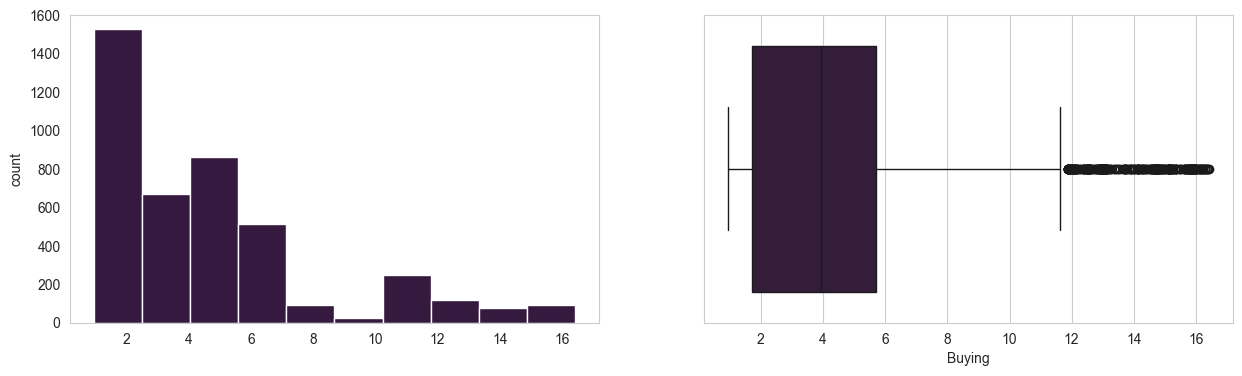

MPR
Skew : 0.81


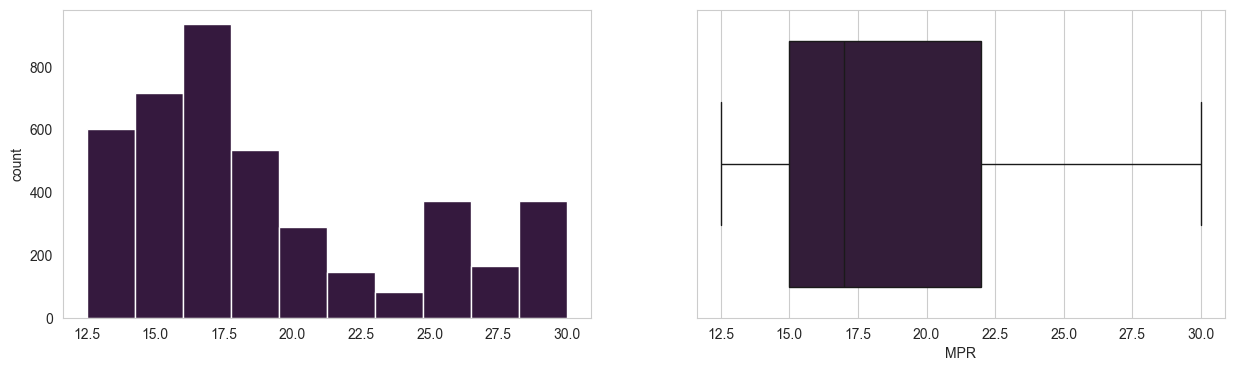

GhInflationRate
Skew : 1.96


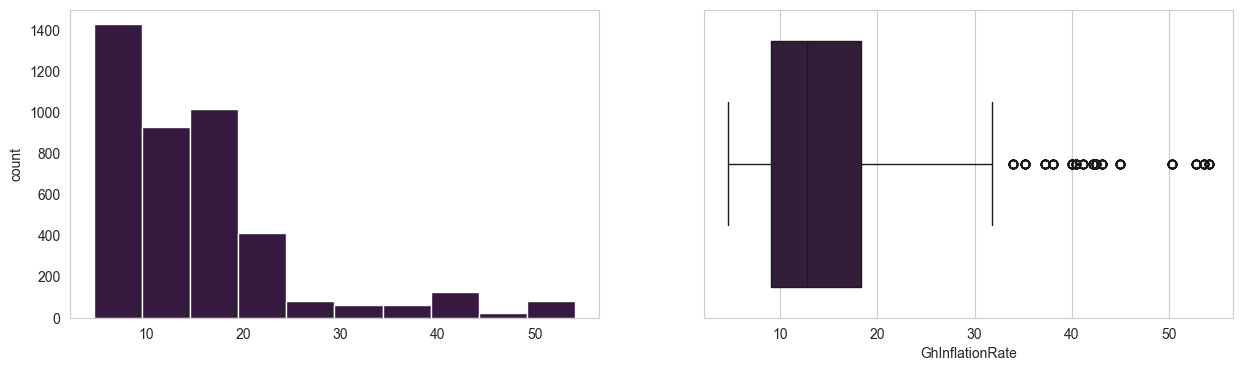

BrentOil
Skew : 0.14


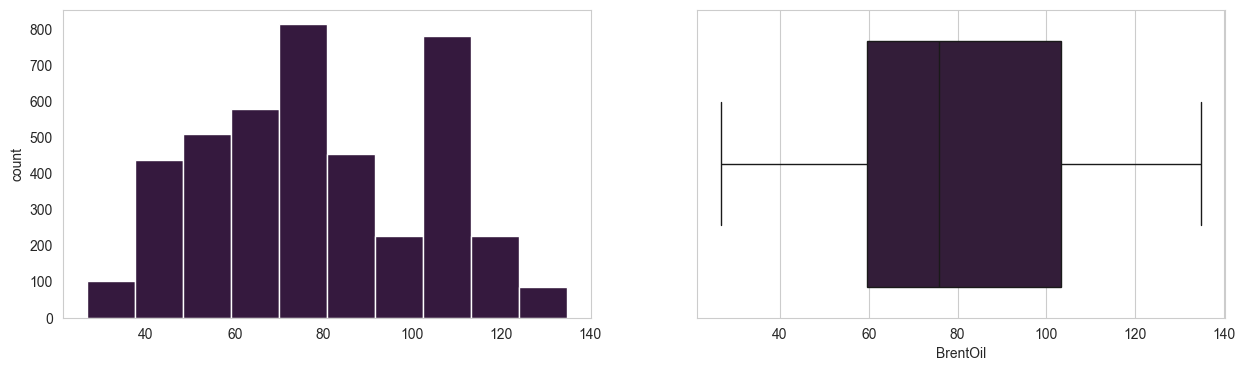

Cocoa
Skew : 10.17


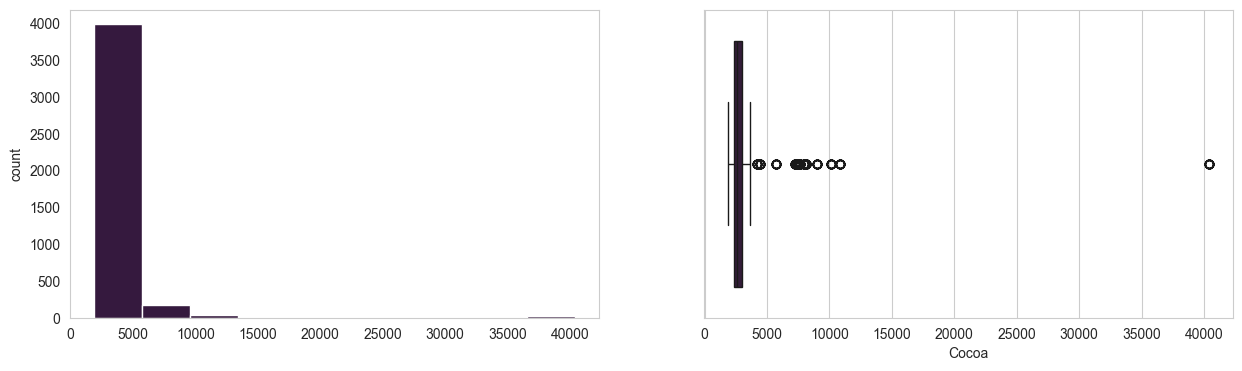

Gold
Skew : 0.7


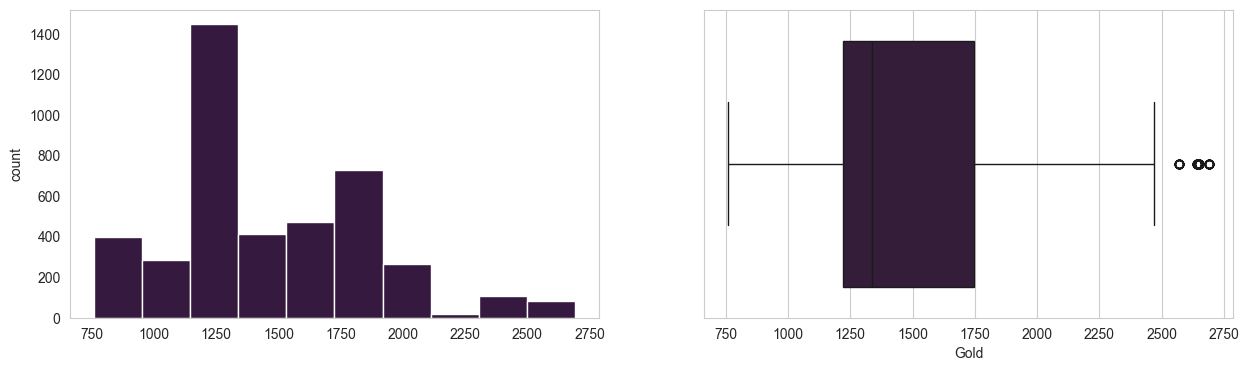

GhInterestRate
Skew : 0.18


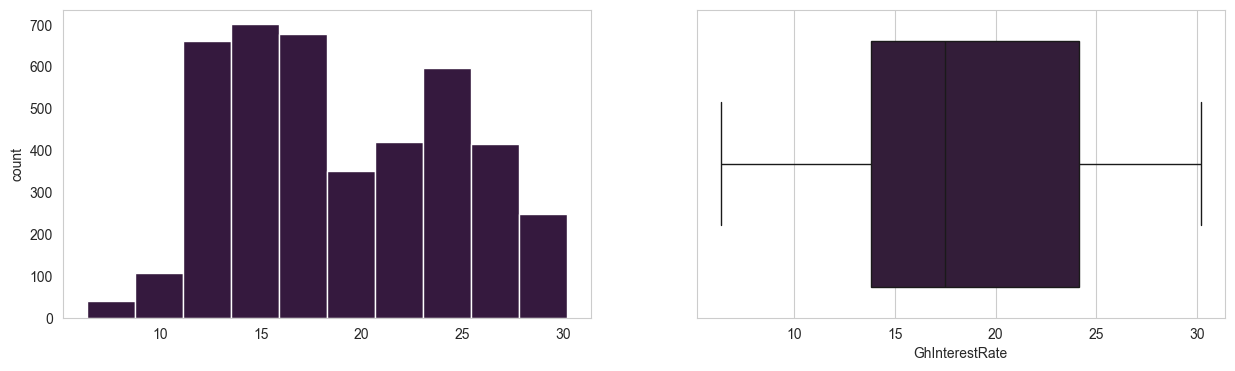

NetForeignAssets
Skew : -0.96


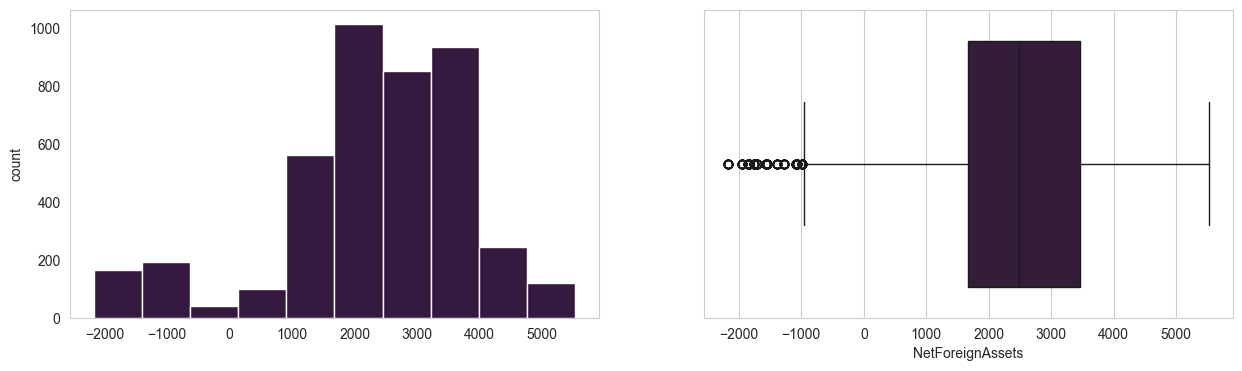

NIR
Skew : 0.75


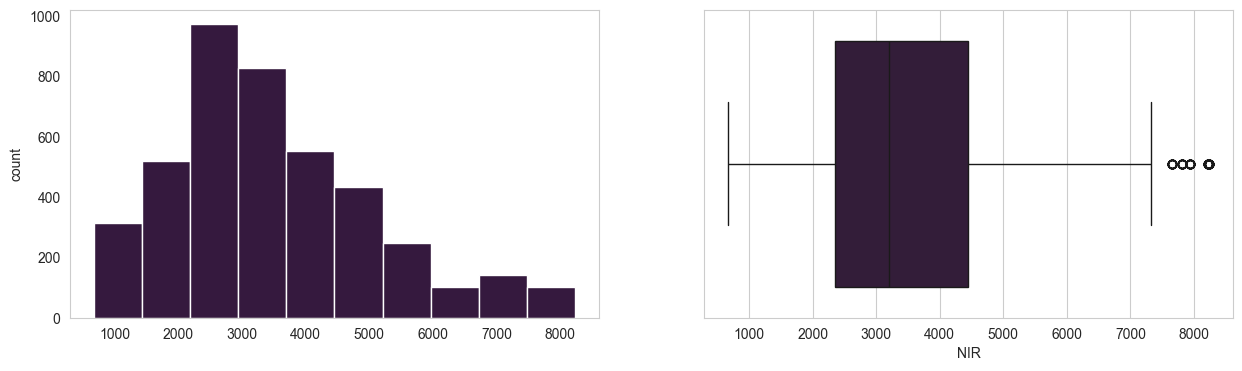

Imports
Skew : -0.03


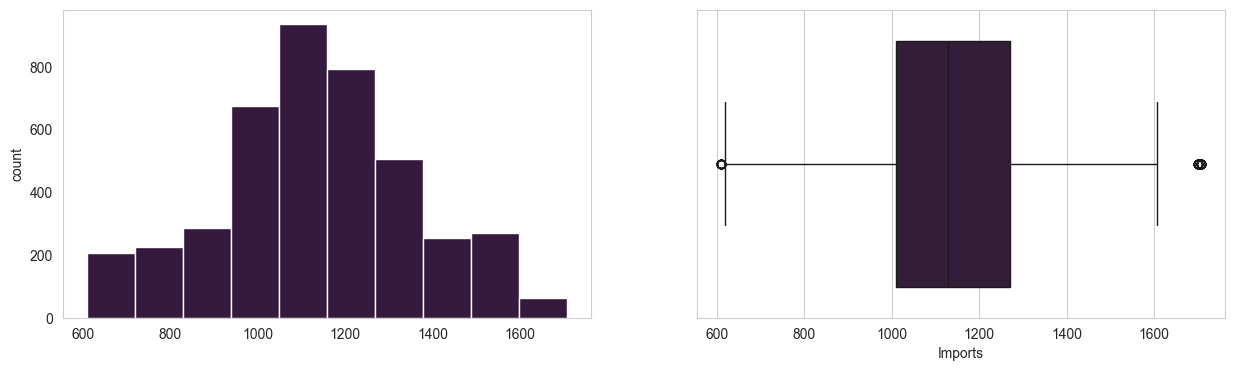

Exports
Skew : -0.32


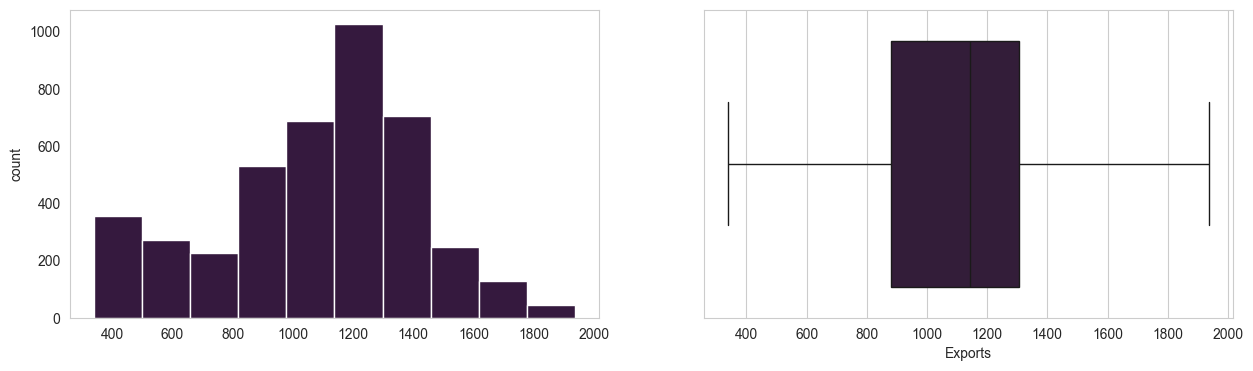

GhGDP
Skew : -0.04


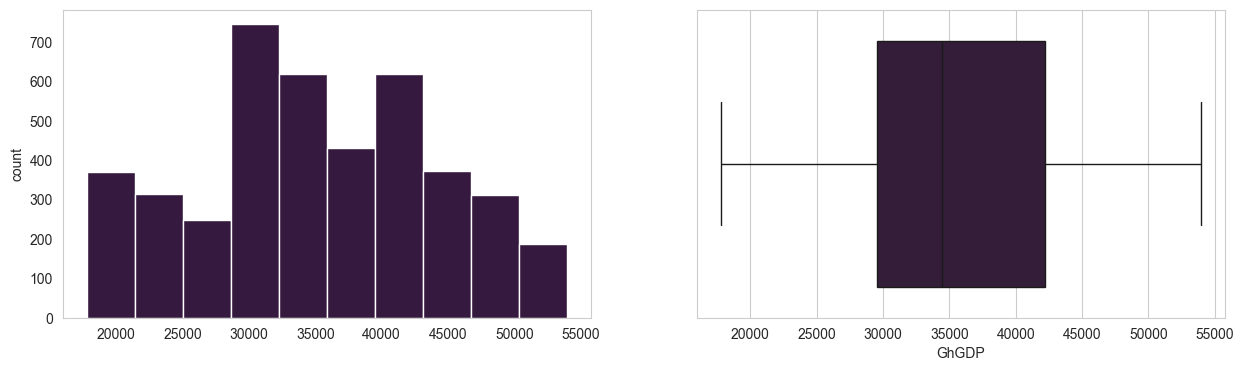

USGDP
Skew : 0.31


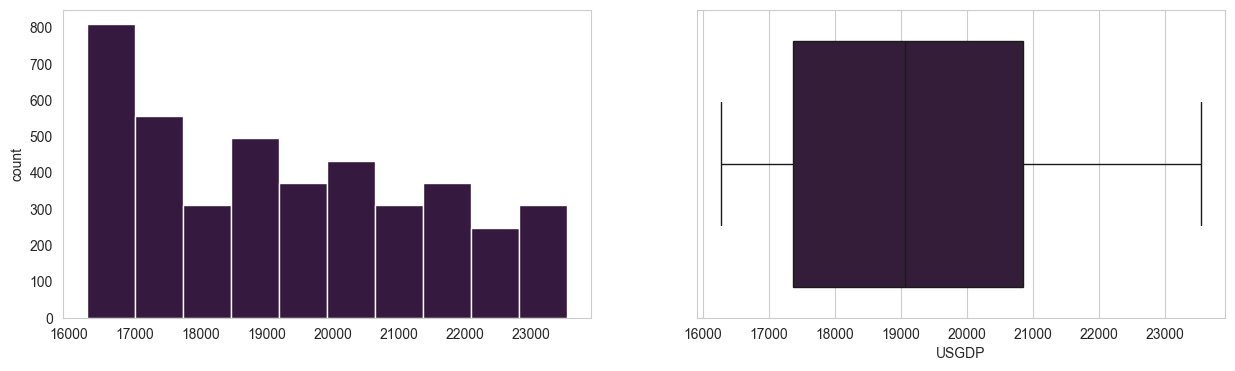

USInflationRate
Skew : 0.74


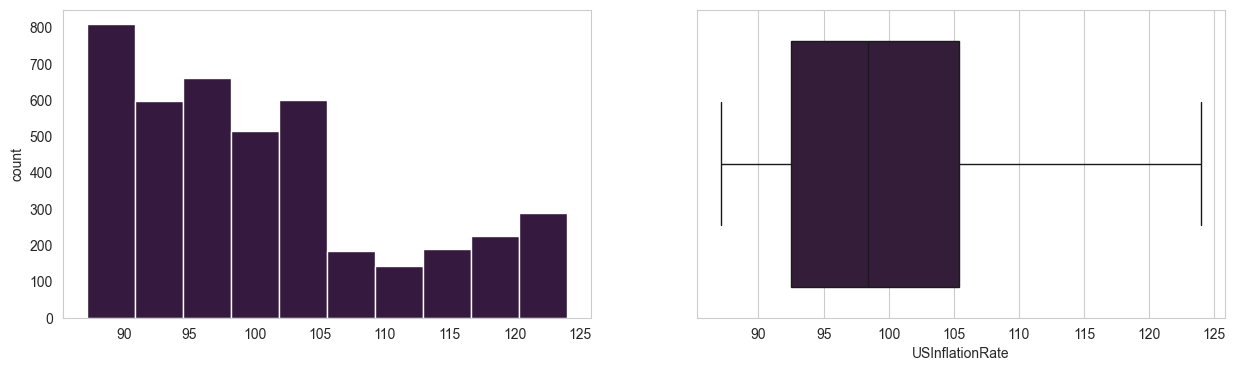

USInterestRate
Skew : 1.48


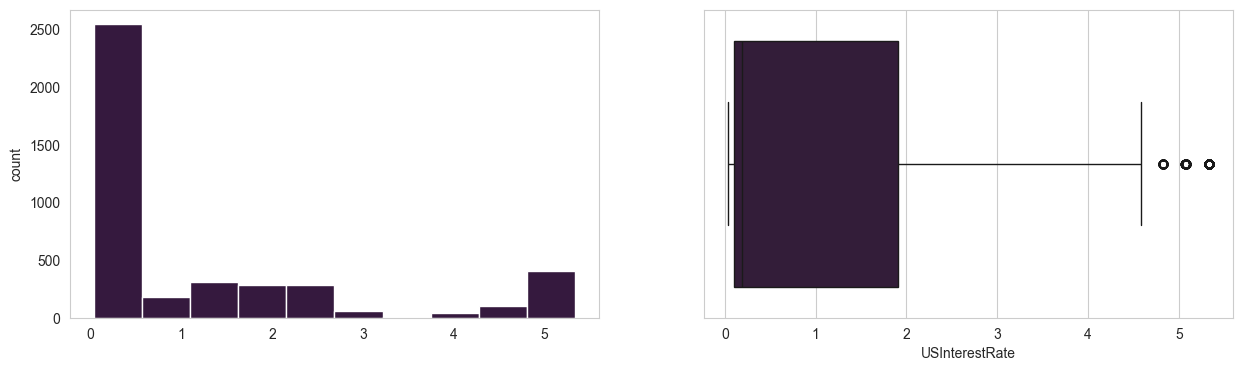

In [66]:
for col in df.columns:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [67]:
correlation_matrix = df.drop(columns=['MPR']).corr()

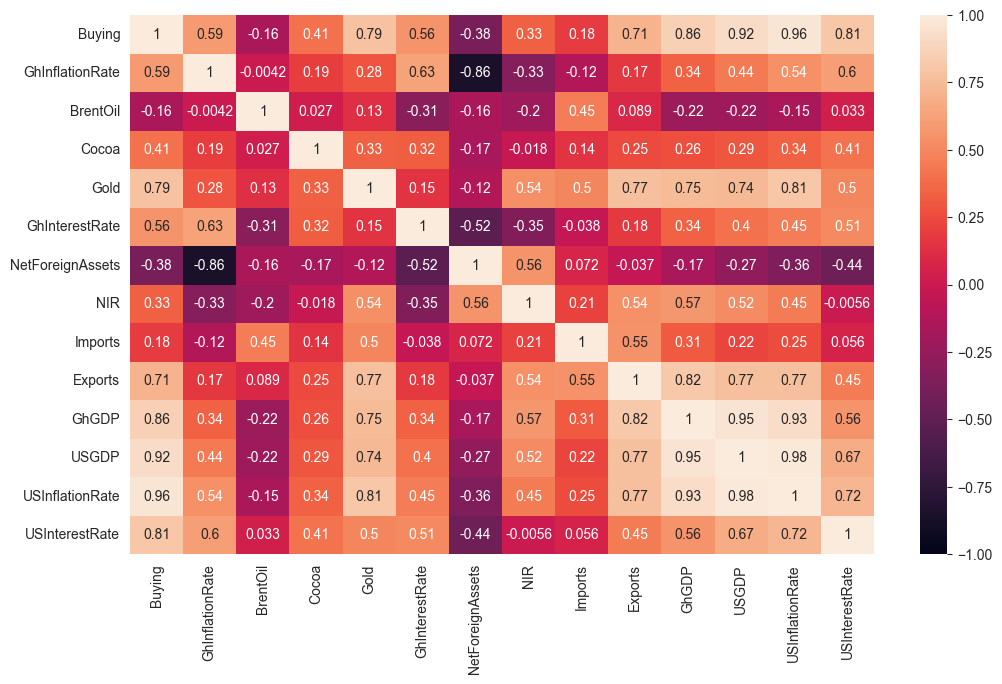

In [68]:
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.show()

In [69]:
print(correlation_matrix['Buying'].sort_values(ascending=False))

Buying              1.000000
USInflationRate     0.963488
USGDP               0.920281
GhGDP               0.856077
USInterestRate      0.805792
Gold                0.786898
Exports             0.705949
GhInflationRate     0.593450
GhInterestRate      0.557237
Cocoa               0.405183
NIR                 0.332597
Imports             0.182203
BrentOil           -0.161048
NetForeignAssets   -0.383589
Name: Buying, dtype: float64



--- 3. Exploratory Data Analysis (EDA) ---


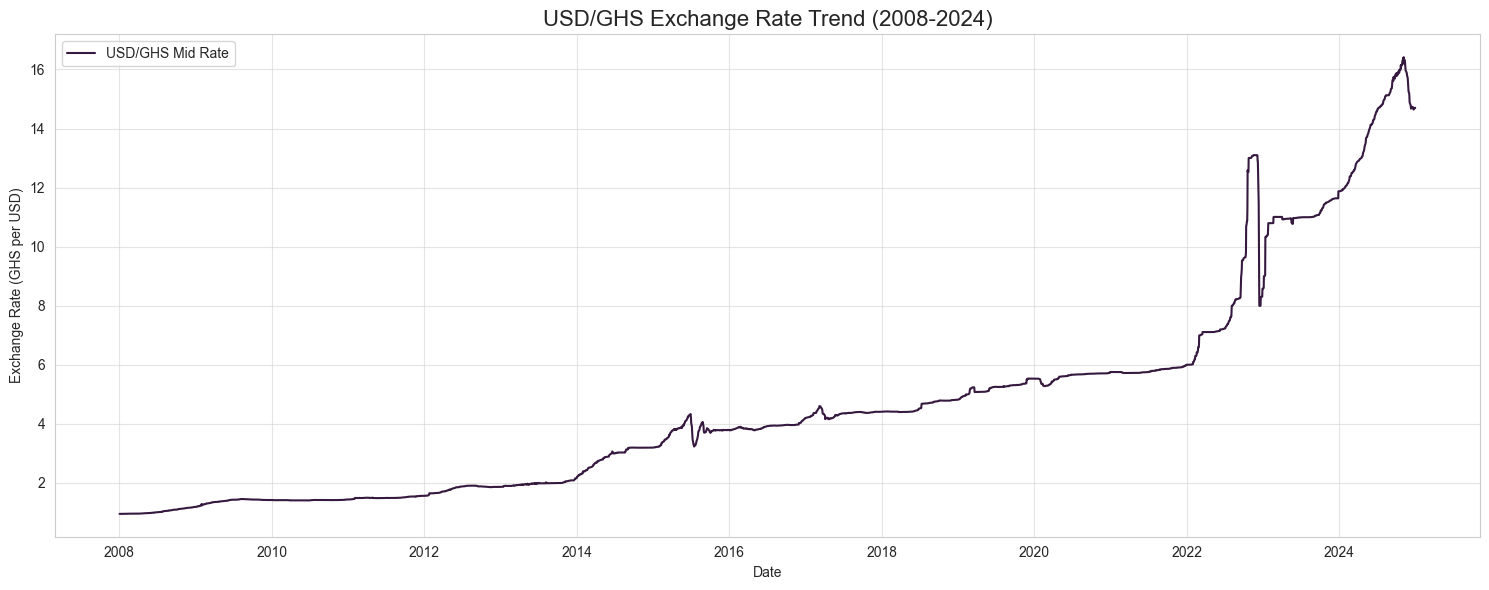

In [70]:
print("\n--- 3. Exploratory Data Analysis (EDA) ---")
plt.figure(figsize=(15, 6))
# plt.plot(df.index, df['Buying'],
#          label='USD/GHS Mid Rate', color='darkblue')
plt.plot(df.index, df['Buying'], label='USD/GHS Mid Rate')
plt.title('USD/GHS Exchange Rate Trend (2008-2024)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Exchange Rate (GHS per USD)')
plt.grid(True, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

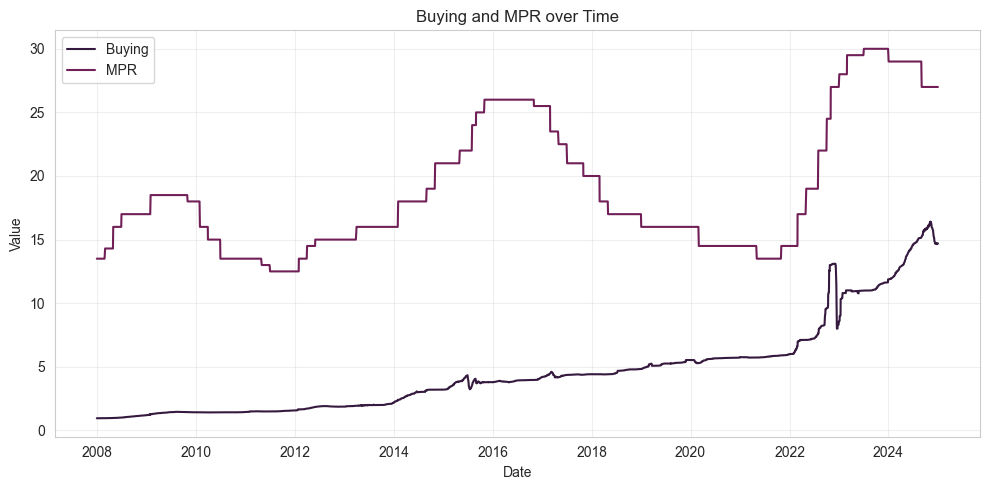

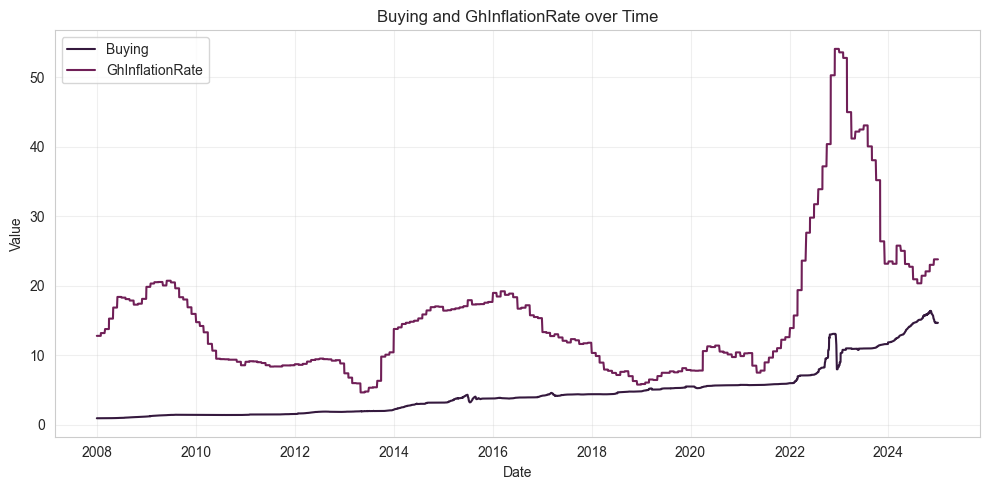

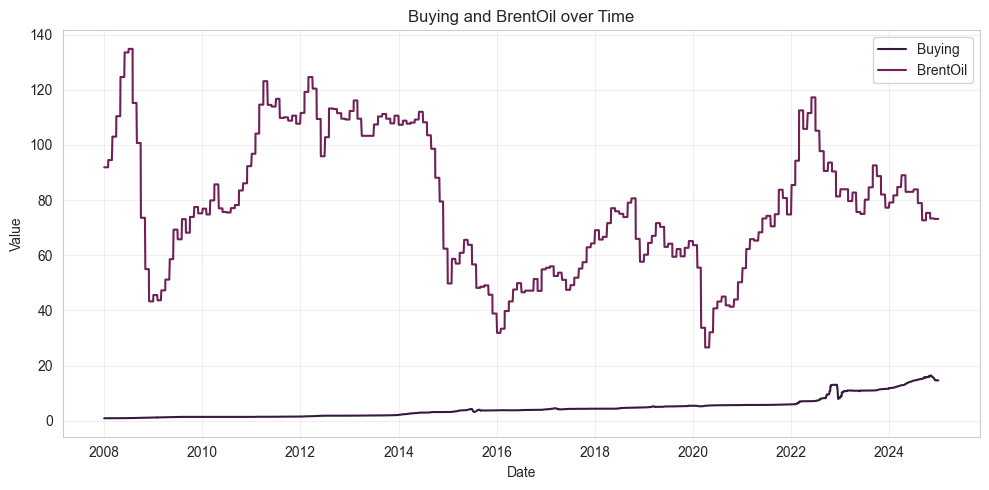

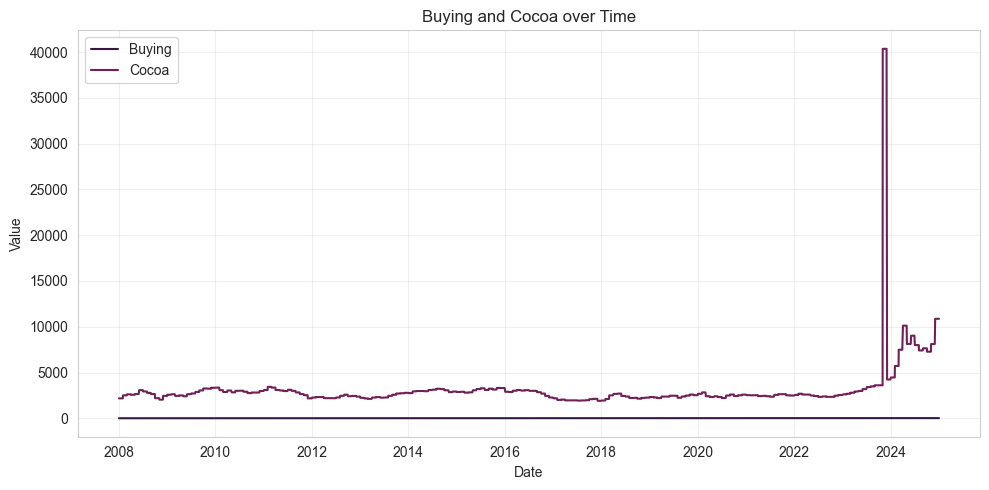

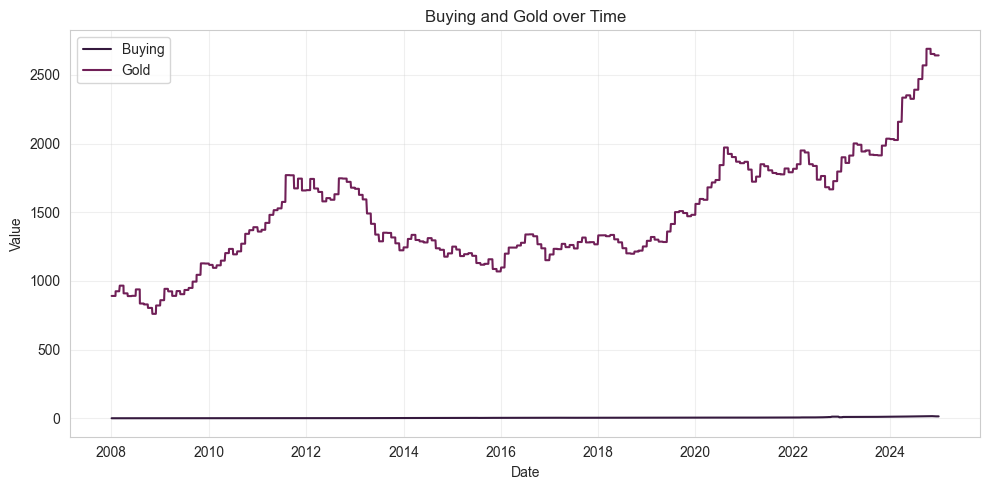

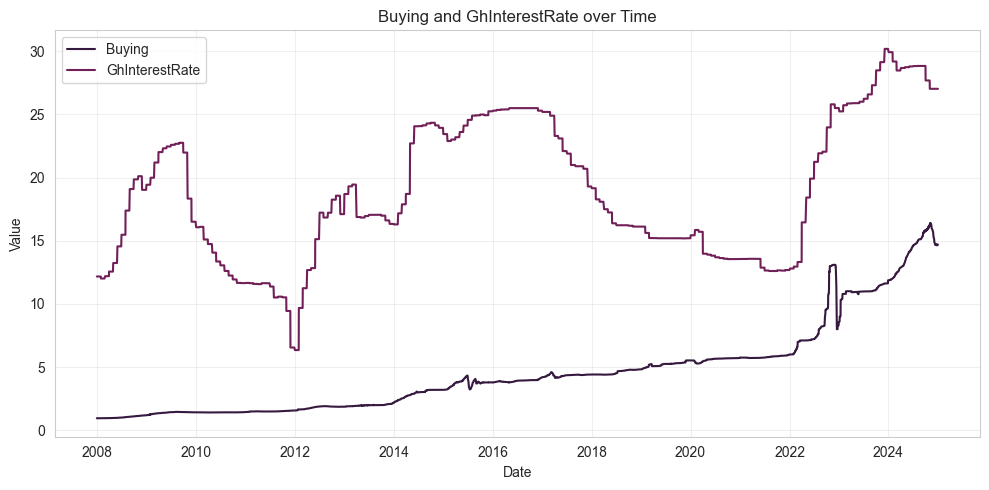

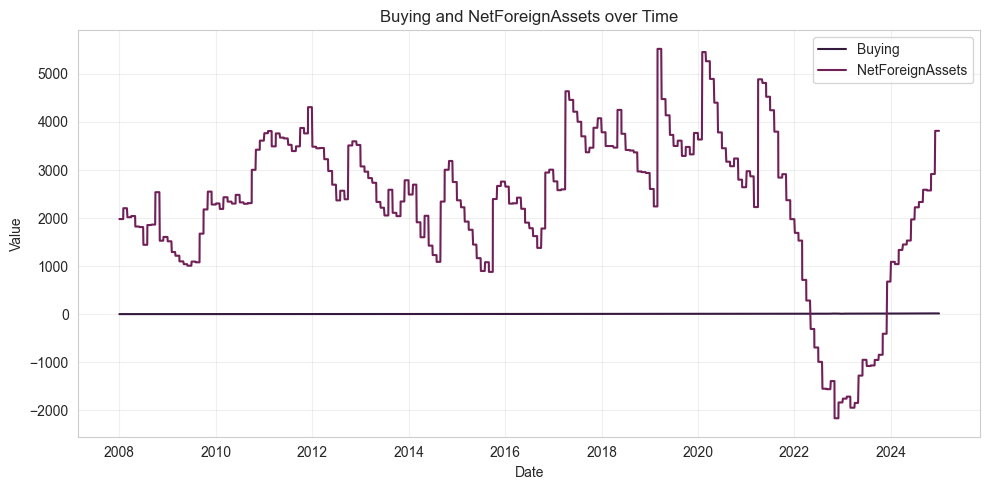

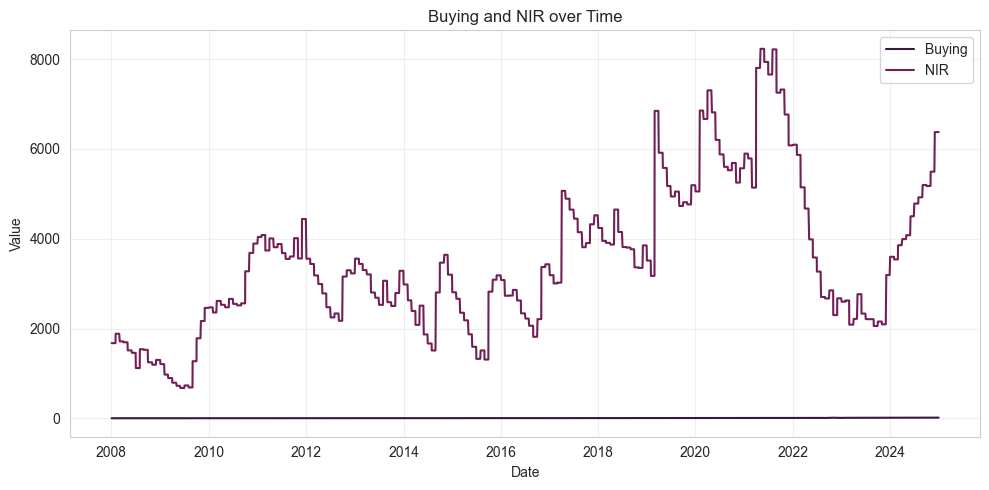

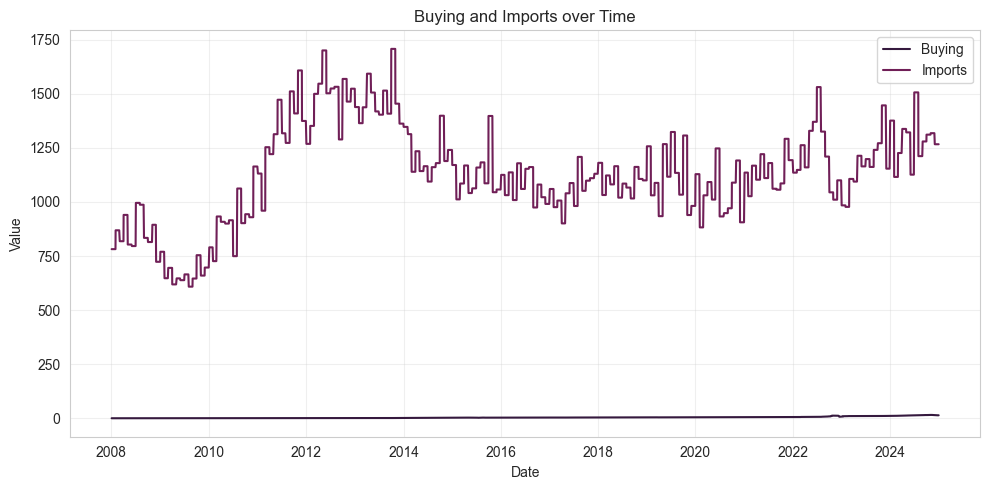

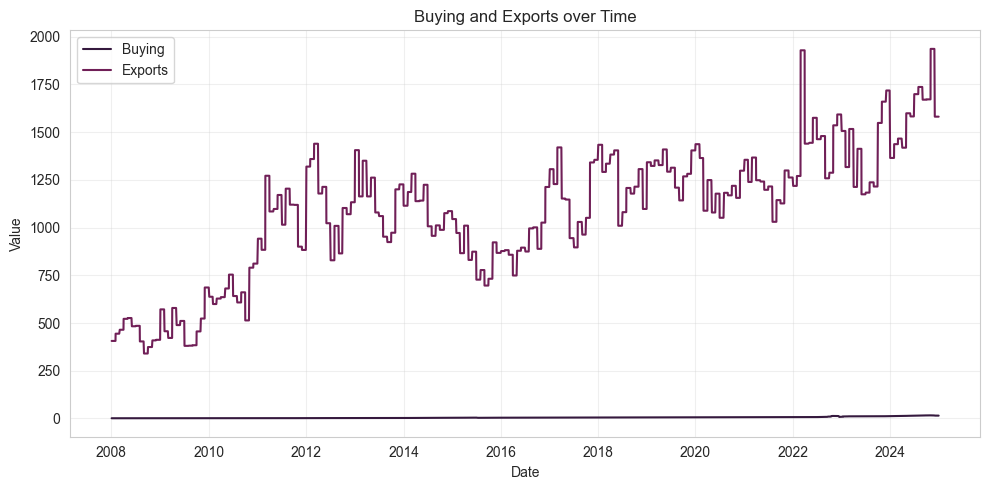

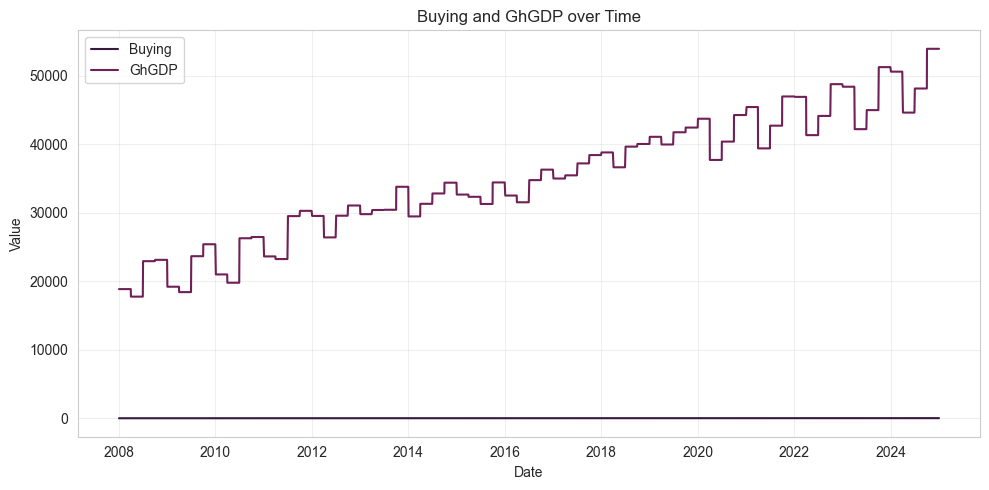

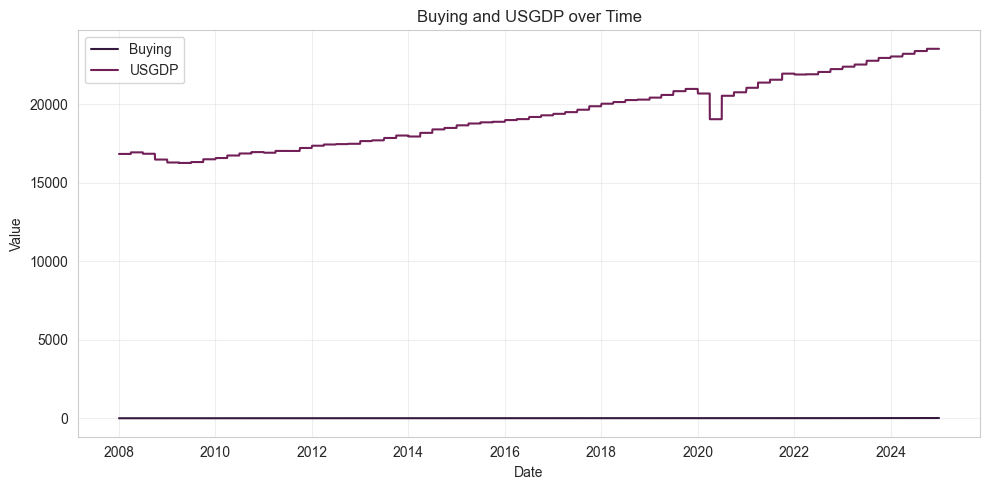

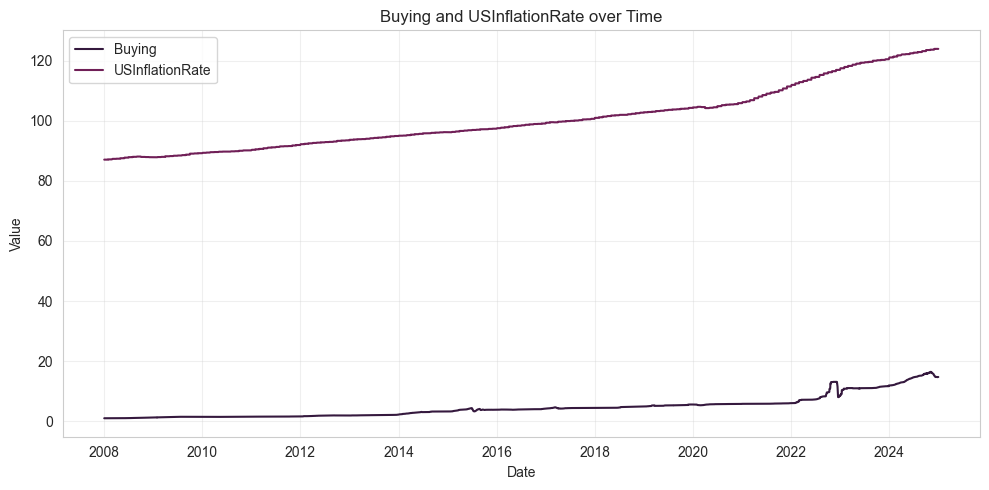

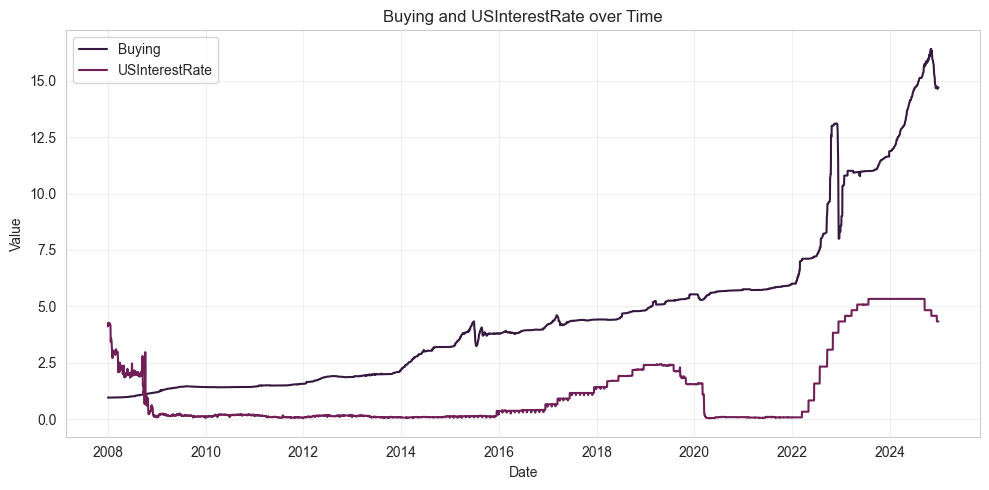

In [73]:
for col in df.columns:
    if col != 'Buying' and df[col].dtype in ['float64', 'int64']:
        plt.figure(figsize=(10, 5))
        plt.plot(df.index, df['Buying'], label='Buying')
        plt.plot(df.index, df[col], label=col)
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'Buying and {col} over Time')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


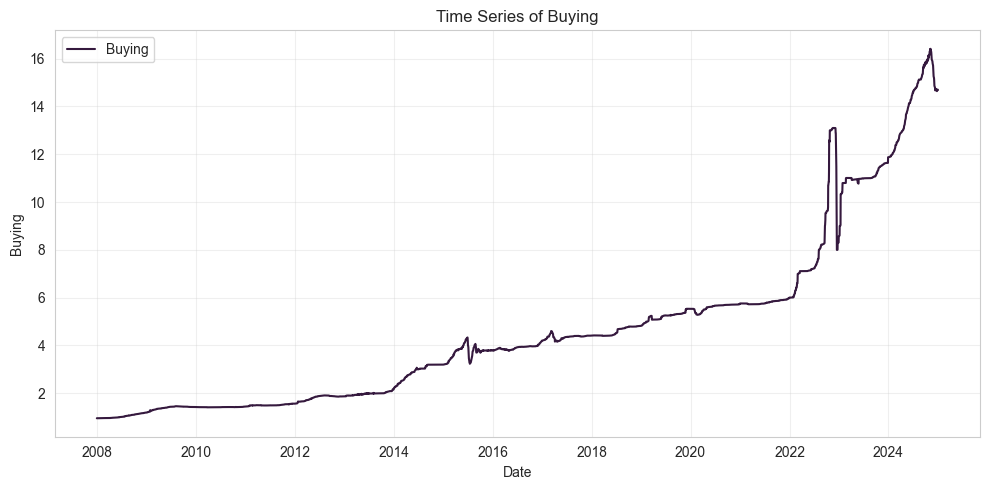

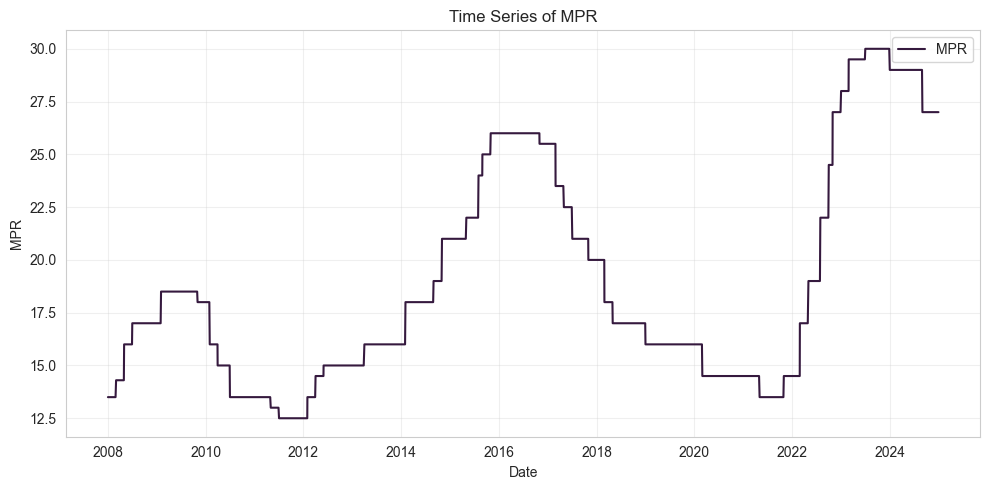

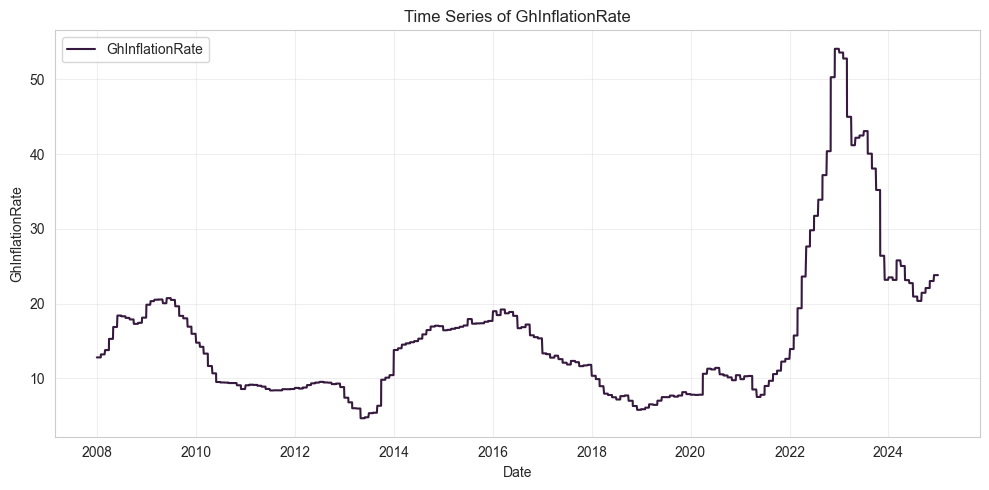

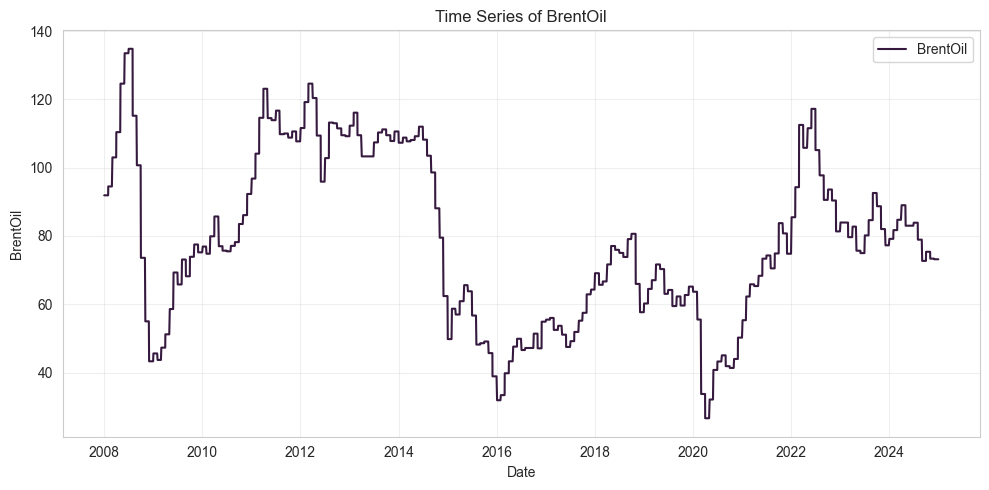

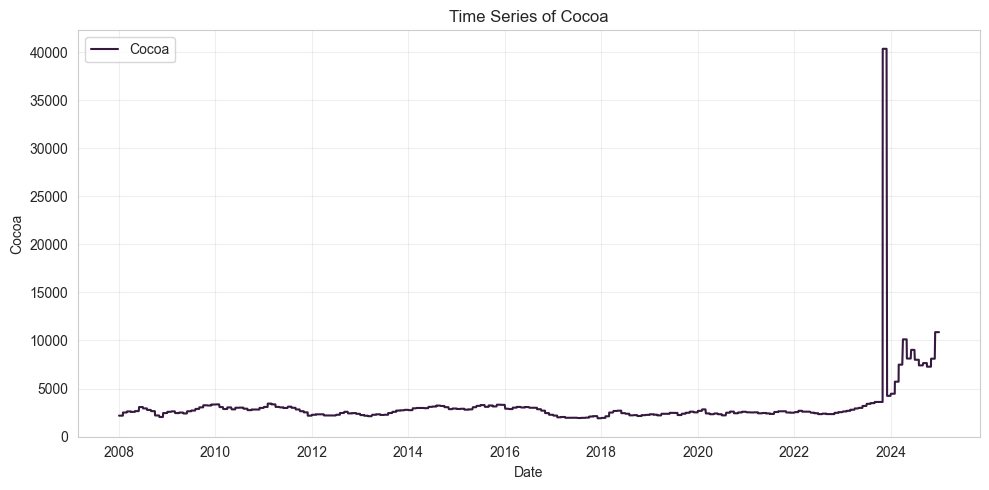

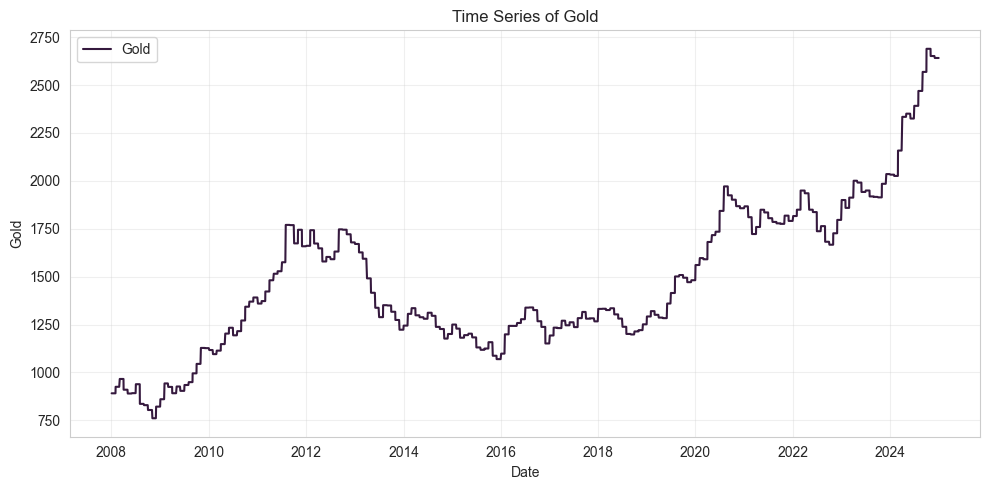

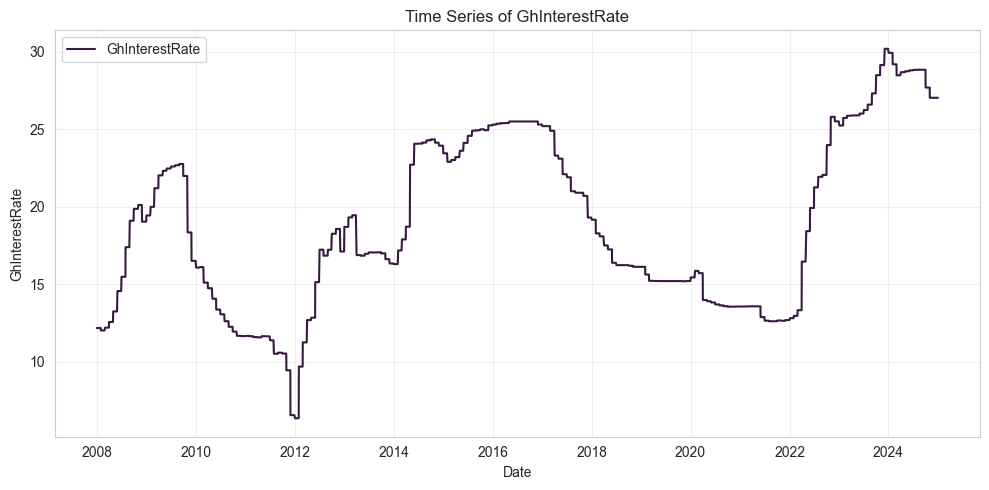

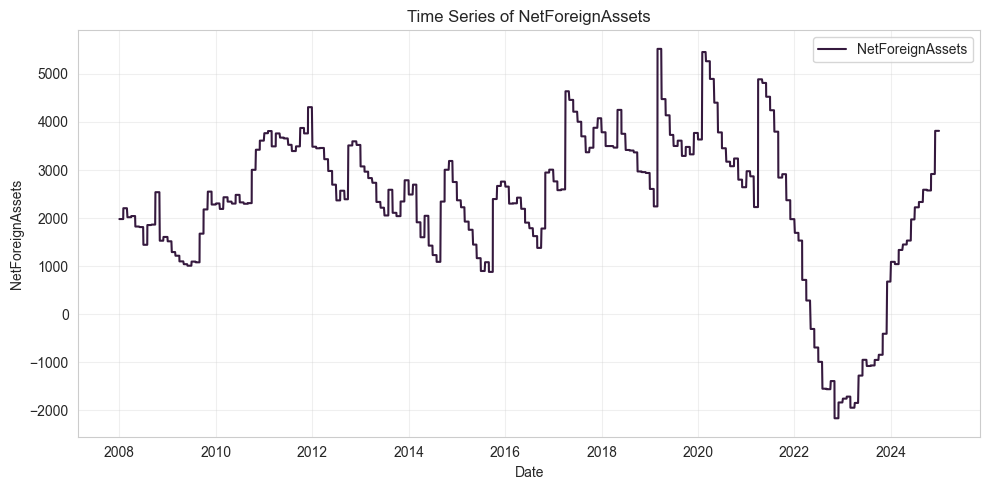

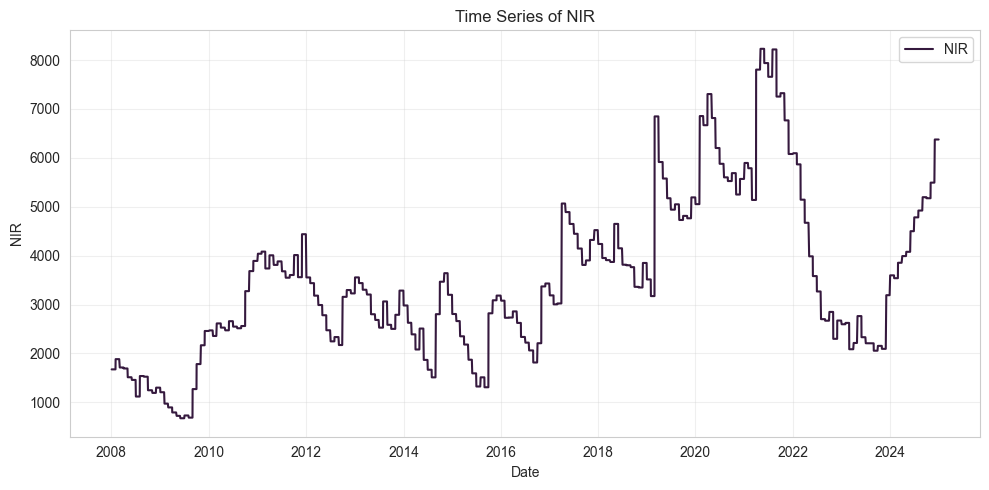

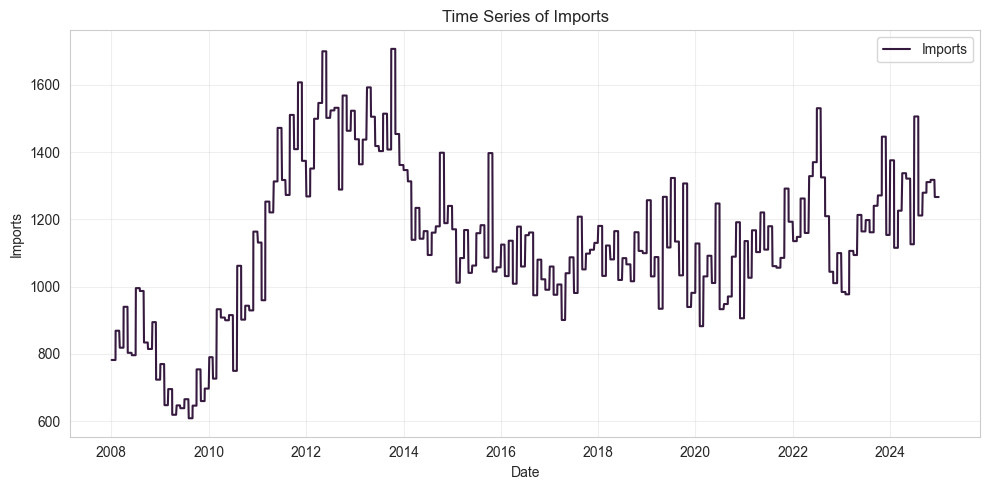

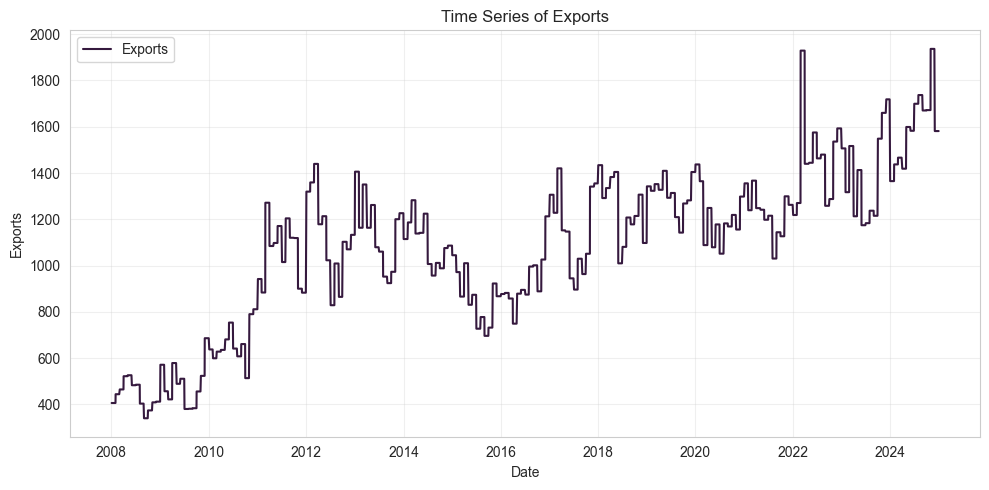

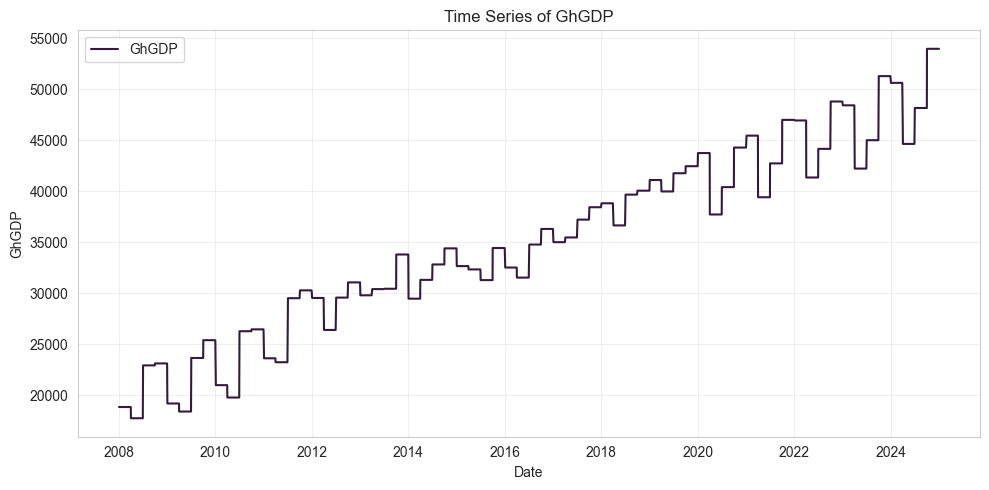

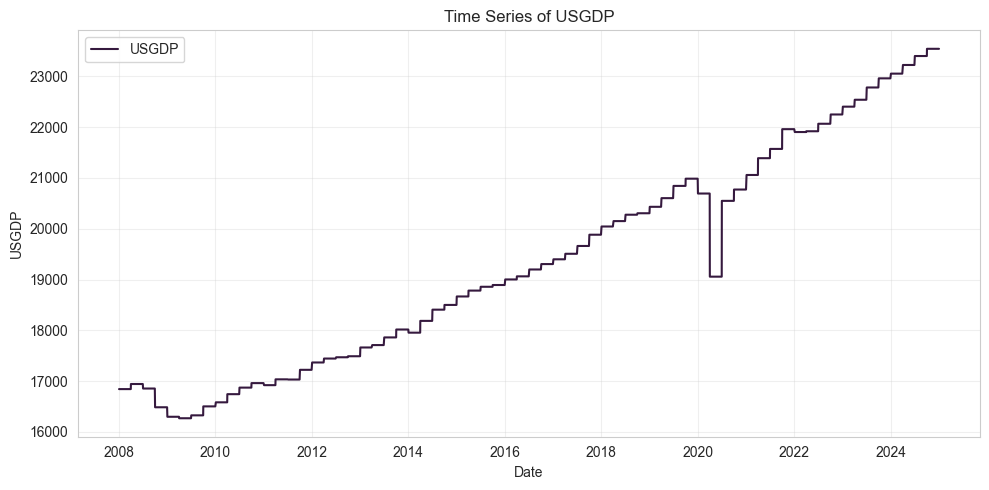

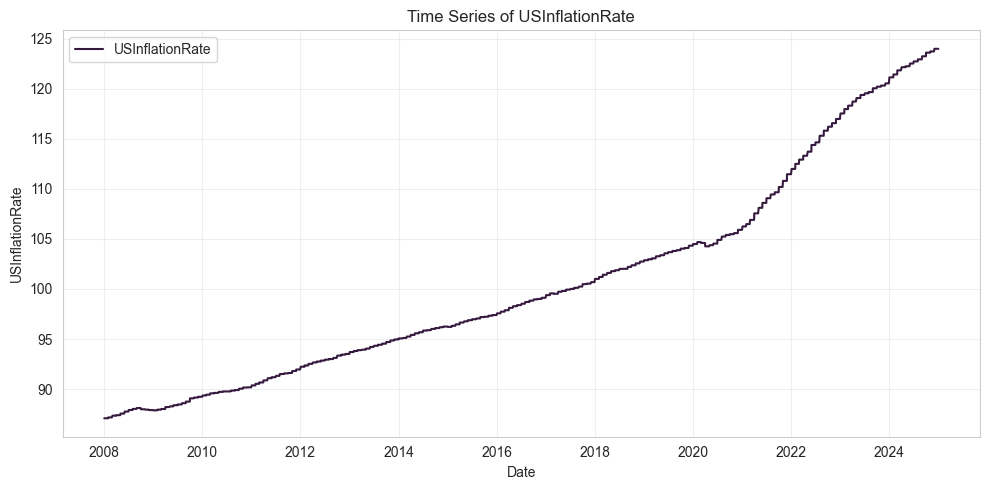

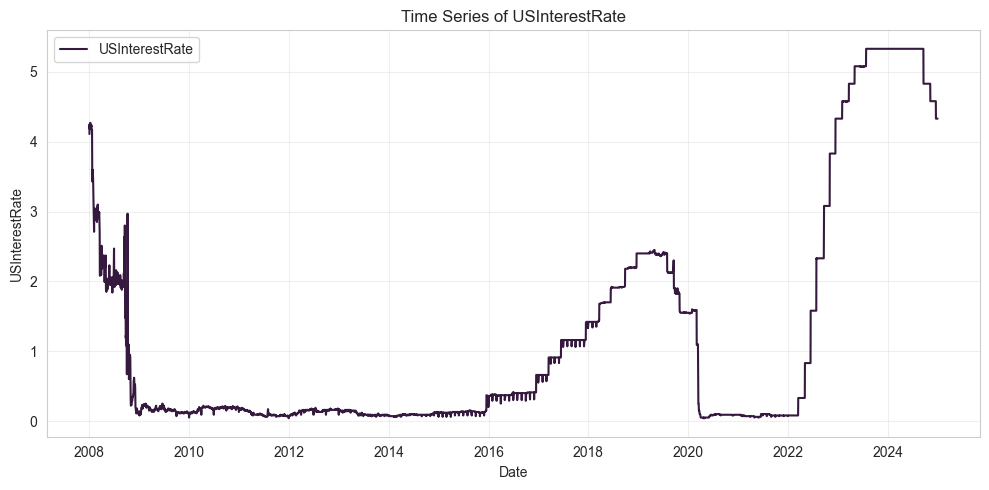

In [72]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        plt.figure(figsize=(10, 5))
        plt.plot(df.index, df[col], label=col)
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.title(f'Time Series of {col}')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
